# Analyze tsp lib

http://vrp.galgos.inf.puc-rio.br/index.php/en/plotted-instances?data=Golden_5

In [30]:
import matplotlib.pyplot as plt

def parse_problem_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    node_coords = {}
    demands = {}
    capacity = 0
    section = None

    for line in lines:
        line = line.strip()
        if line.startswith("CAPACITY"):
            capacity = int(line.split(":")[1].strip())
        elif line == "NODE_COORD_SECTION":
            section = "NODE_COORD_SECTION"
        elif line == "DEMAND_SECTION":
            section = "DEMAND_SECTION"
        elif line == "DEPOT_SECTION":
            section = None
        elif section == "NODE_COORD_SECTION":
            parts = line.split()
            node_id, x, y = int(parts[0]), float(parts[1]), float(parts[2])
            node_coords[node_id] = (x, y)
        elif section == "DEMAND_SECTION":
            parts = line.split()
            node_id, demand = int(parts[0]), int(parts[1])
            demands[node_id] = demand

    return node_coords, demands, capacity

def parse_solution_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    routes = []
    cost = None

    for line in lines:
        line = line.strip()
        if line.startswith("Route"):
            route = list(map(int, line.split(":")[1].strip().split()))
            routes.append(route)
        elif line.startswith("Cost"):
            cost = float(line.split()[1])

    return routes, cost

def plot_solution(node_coords, routes, cost, omit_depot_connections, hide_annotations, output_path="solution_plot.png"):
    plt.figure(figsize=(12, 8))
    for route_idx, route in enumerate(routes, start=1):
        x_coords = [node_coords[node][0] for node in route]
        y_coords = [node_coords[node][1] for node in route]

        marker = '' if hide_annotations else 'o'

        if omit_depot_connections:
            # Plot the route without connecting to the depot
            plt.plot(x_coords, y_coords, marker=marker, label=f"Route {route_idx}")
        else:
            # Add depot at the start and end of the route
            depot_coords = node_coords[1]  # Assuming depot is always node 1
            x_coords = [depot_coords[0]] + x_coords + [depot_coords[0]]
            y_coords = [depot_coords[1]] + y_coords + [depot_coords[1]]

            # Plot the route with depot connections
            plt.plot(x_coords, y_coords,  marker=marker,label=f"Route {route_idx}")

        # Annotate nodes
        if not hide_annotations:
            for i, node in enumerate(route):
                plt.text(node_coords[node][0], node_coords[node][1], str(node), fontsize=8)

    # Plot depot
    plt.scatter(*node_coords[1], color='red', s=100, label="Depot")

    # Add labels and legend
    plt.title(f"VRP Solution Visualization (Routes: {len(routes)} Cost: {cost})")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=10, fontsize=8)
    
    plt.grid(True)
    #plt.savefig(output_path)
    plt.show()

def visualize(problem_file, solution_file):
    omit_depot_connections = True
    hide_annotations = True

    # Parse files
    node_coords, _, _ = parse_problem_file(problem_file)
    routes, cost = parse_solution_file(solution_file)

    # Plot solution
    plot_solution(node_coords, routes, cost, omit_depot_connections, hide_annotations)


## Optimal

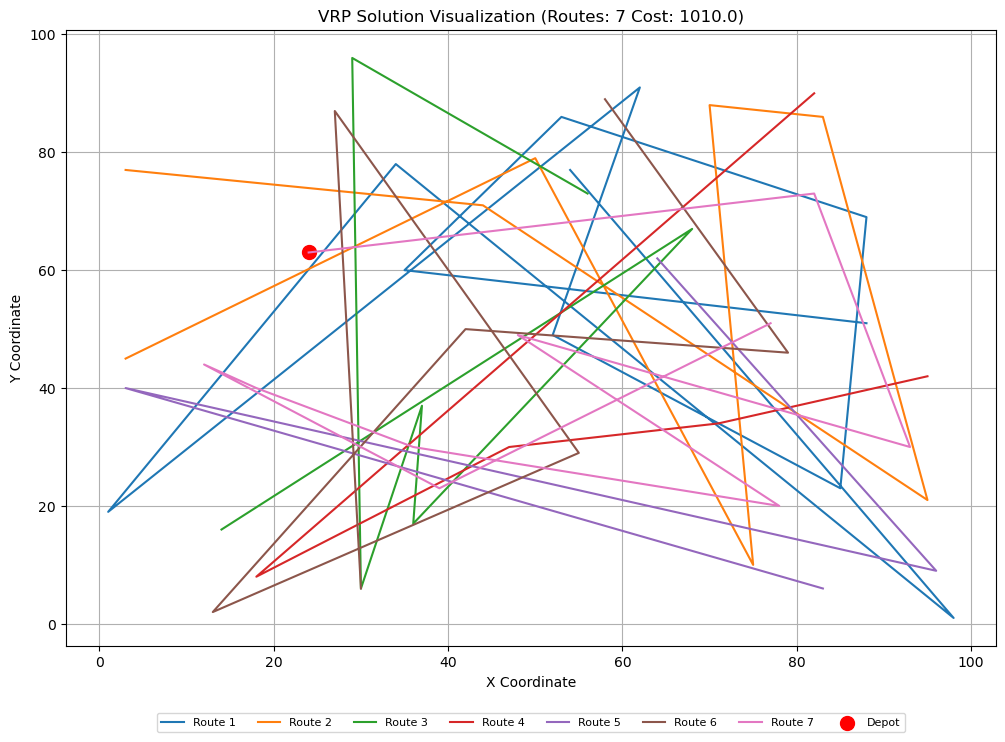

In [31]:
problem_file = "/home/reinterpretcat/workspaces/vrp/personal/test_data/scientific/A-n53-k7.vrp"
solution_file = "/home/reinterpretcat/workspaces/vrp/personal/test_data/scientific/A-n53-k7.sol"

visualize(problem_file, solution_file)

## Experimental

```shell
target/release/vrp-cli solve tsplib /home/reinterpretcat/workspaces/vrp/personal/test_data/scientific/Golden_5.vrp -o /home/reinterpretcat/workspaces/vrp/personal/test_data/scientific/Golden_5_test.sol --log --max-time=60      
```

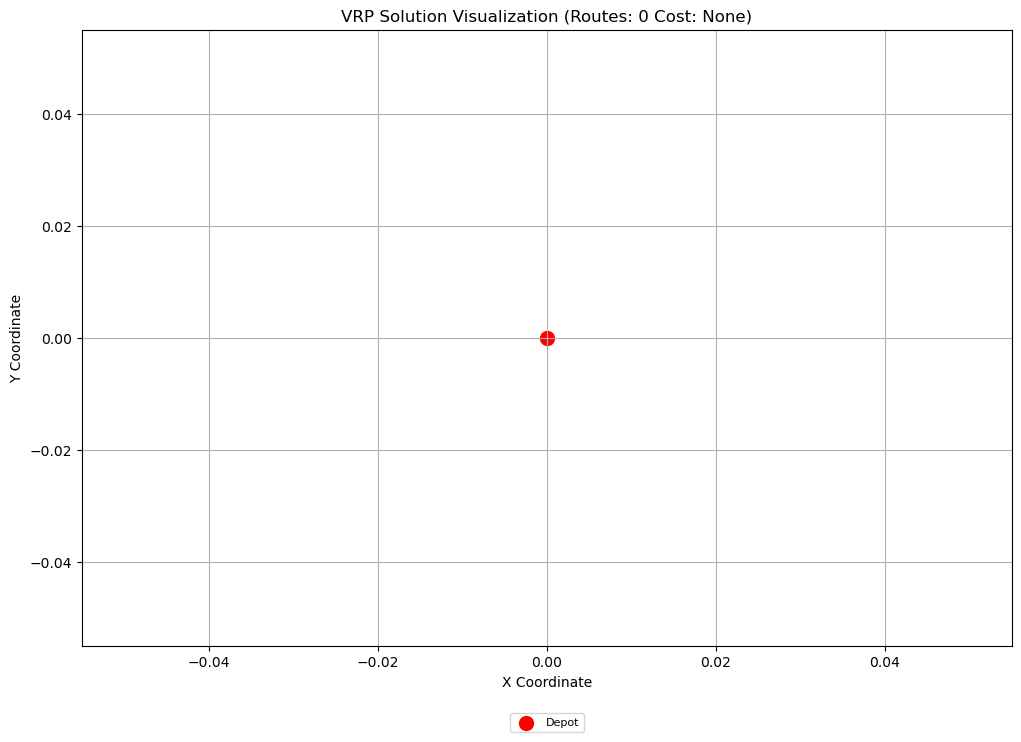

In [32]:
problem_file = "/home/reinterpretcat/workspaces/vrp/personal/test_data/scientific/Golden_5.vrp"
solution_file = "/home/reinterpretcat/workspaces/vrp/personal/test_data/scientific/Golden_5_test.sol"

visualize(problem_file, solution_file)